## Character Classification using the K-Nearest Neighbors (KNN) Classifier

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import heapq
from collections import Counter


dummy_image = cv2.imread("../dataset/Noise Train/A1a1.jpg",cv2.IMREAD_GRAYSCALE)
# # The reason why we read it as a grayscale image, so that we can ignore the
# # extra parameter that is the RGB channel
print(len(dummy_image))
print(len(dummy_image[0]))

images_per_class = 7
number_of_classes = 26
train_path = "../dataset/Noise Train"
images = []
labels = []
dummy_image

12
12


array([[  0, 255, 251,   0, 255,  10, 242, 255, 252, 248,   0, 255],
       [ 19, 248, 247, 255, 255,  24, 255, 255, 248, 250,   0,   0],
       [229, 239, 255, 255,   0,  15, 249, 255,   0, 241, 175,   9],
       [ 69,  69,  64,  61,   5, 249,  87, 233, 253, 255, 255,   6],
       [  4, 255, 241,   4, 255,   0,   0, 255,   0,   0, 252,  24],
       [255,   2, 255, 246, 151,   0, 255, 249, 255, 247, 255, 249],
       [  3, 116, 249, 255, 243, 245, 183, 251, 221, 255,   0,  23],
       [  5, 240, 249, 255, 255, 153,  16, 243, 255, 233,   0,  12],
       [237, 255, 234, 255,   0,   0,  10, 241, 255, 235, 255,   3],
       [255, 241, 246, 251,   0,  16, 247,   0, 255, 255,   7, 255],
       [240, 255, 255, 235, 255, 255, 240, 255, 229, 255, 211, 246],
       [  0, 255, 248, 255, 240, 237, 223,   4, 255, 255, 255,   0]],
      dtype=uint8)

#### So we are dealing with 12x12 images
#### Let us read all of our training data set

In [2]:
files = [f for f in os.listdir(train_path) if f.endswith(".jpg")]
files.sort()

for i in enumerate(files):
    image_path = os.path.join(train_path, files[i[0]])
    img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE).flatten()
    img = img/255.0
    images.append(img)
    labels.append(chr((i[0]//images_per_class)+97))
images = np.array(images)
labels = np.array(labels)
print(labels[0])
print(labels[20])
len(images[0])
# Now we have our training dataset in images and their target value in labels.

    

a
c


144

In [3]:
def knn(train_data, train_labels, test_data, K): # returns an of predicted labels
    test_labels=[]
    for i in range(len(test_data)):
        distances = []
        for j in range(len(train_data)):
            distance = np.linalg.norm(test_data[i]- train_data[j])
            label = train_labels[j]
            distances.append((label,distance)) # so distances is a tuple (_label_, _distance_)
        nearest_distances = heapq.nsmallest(K, distances, key=lambda x: x[1])
        labels = [label for label, _ in nearest_distances]
        label_counts = Counter(labels)
        most_common_label = label_counts.most_common(1)[0][0]
        test_labels.append(most_common_label) 
    return test_labels         


In [4]:
best_ks =[]
best_accs =[]
plotting_data_train =[]
for m in range(10): # iterating over folds
    img_train_cv, img_test_cv, label_train_cv, label_test_cv = train_test_split(images, labels, test_size=0.2, random_state=30-m)
    cv_accuracy=[]
    for k in range(1,41): # iterating over possible K values
        predicted_labels = knn(img_train_cv,label_train_cv,img_test_cv,k)
        total_labels=0
        correct_labels=0
        for i in range(len(predicted_labels)): # iterating over each prediction to calculate accuracy
            total_labels +=1
            if predicted_labels[i] == label_test_cv[i]:
                correct_labels +=1
        cv_accuracy.append((k,(100*(correct_labels/total_labels))))
    best_k, best_acc = max(cv_accuracy, key=lambda x: x[1])
    best_ks.append(best_k)
    best_accs.append(best_acc)
    plotting_data_train.append(cv_accuracy)
k_counts = Counter(best_ks)
best_k_cv = k_counts.most_common(1)[0][0]
sum_cv =0
for m in range(len(best_accs)):
    if best_ks[m] == best_k_cv:
        sum_cv += best_accs[m]
avg_accuracy = (float(sum_cv) / k_counts.most_common(1)[0][1])
print((np.array(plotting_data_train)).shape)
print(best_k_cv,avg_accuracy)

(10, 40, 2)
3 90.27027027027027


#### Best k is K=3 with a **90.27** accuracy
#### Let us plot the performace of the different k values

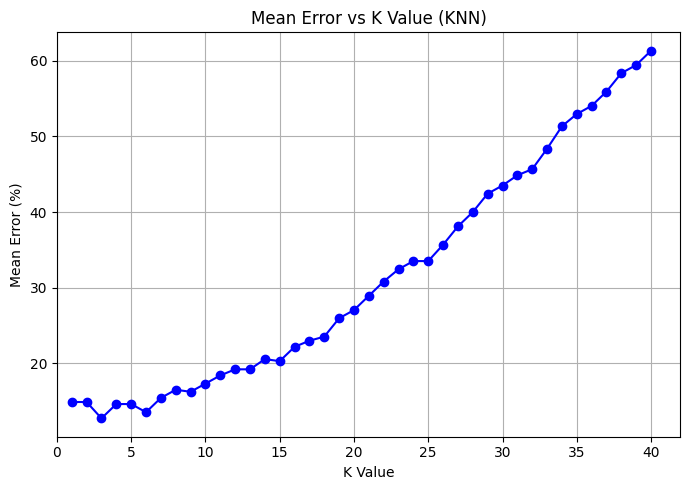

In [5]:
plotting_data = []
for ks in range(len(plotting_data_train[0])): # 40
    sum =0
    for num in range(len(plotting_data_train)): # 10
        sum += plotting_data_train[num][ks][1]
    mean_acc = sum/10
    plotting_data.append((ks+1,mean_acc))

k_values = [item[0] for item in plotting_data]  # First element of each tuple
mean_errors = [100 -item[1] for item in plotting_data]  # Second element of each tuple

plt.figure(figsize=(7, 5))
plt.plot(k_values, mean_errors, marker='o', linestyle='-', color='b')
plt.xlabel('K Value')
plt.ylabel('Mean Error (%)')
plt.xlim(left=0) 

plt.title('Mean Error vs K Value (KNN)')
plt.grid(True)
plt.tight_layout()

plt.savefig('KNN.jpg')
plt.show()

#### Testing use the Noise Test dataset

In [6]:
test_images_per_class = 2
test_path = "../dataset/Noise Test"
test_images = []
test_labels = []

test_files = [f for f in os.listdir(test_path) if f.endswith(".jpg")]
test_files.sort()

for i in enumerate(test_files):
    test_image_path = os.path.join(test_path, test_files[i[0]])
    test_img = cv2.imread(test_image_path,cv2.IMREAD_GRAYSCALE).flatten()
    test_img = test_img/255.0
    test_images.append(test_img)
    test_labels.append(chr((i[0]//test_images_per_class)+97))
test_images = np.array(test_images)
test_labels = np.array(test_labels)
print(test_labels.shape)
print(test_images.shape)

(52,)
(52, 144)


In [7]:
test_predicted_labels = knn(images,labels,test_images,best_k_cv)
test_predicted_labels = np.array(test_predicted_labels)
print(test_predicted_labels.shape)

char_counts ={}
for j in range(len(test_labels)):
    if test_labels[j] == test_predicted_labels[j]:
        char_counts[test_labels[j]] = char_counts.get(test_labels[j], 0) + 1



print(char_counts)
test_predicted_labels
len(test_labels)
    

(52,)
{np.str_('a'): 2, np.str_('b'): 2, np.str_('c'): 2, np.str_('d'): 2, np.str_('e'): 2, np.str_('f'): 2, np.str_('g'): 2, np.str_('h'): 1, np.str_('i'): 1, np.str_('j'): 2, np.str_('k'): 2, np.str_('l'): 2, np.str_('m'): 2, np.str_('n'): 2, np.str_('o'): 2, np.str_('p'): 2, np.str_('q'): 2, np.str_('r'): 2, np.str_('s'): 2, np.str_('t'): 2, np.str_('u'): 2, np.str_('v'): 2, np.str_('w'): 2, np.str_('x'): 2, np.str_('y'): 2, np.str_('z'): 1}


52

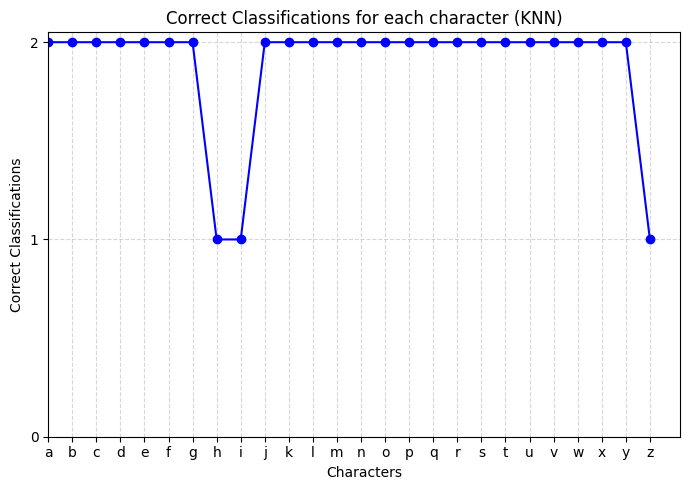

In [8]:
char_counts = dict(sorted(char_counts.items()))
chars = list(char_counts.keys())
counts = list(char_counts.values())


plt.figure(figsize=(7, 5))
plt.plot(chars, counts, marker='o', linestyle='-', color='b')
plt.xlabel('Characters')
plt.ylabel('Correct Classifications')
plt.xlim(left=0) 
plt.ylim(bottom=0) 
plt.yticks(np.arange(0, max(counts) + 1, 1))

plt.title('Correct Classifications for each character (KNN)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig('Accuracy.jpg')
plt.show()

## All done 🥳